Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# 1. Replicate the lesson code.

In [0]:
# Imoprt tools:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Titanic data set.
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

In [0]:
# use the titanic csv url to create a dataframe with pandas
titanic_data = pd.read_csv(url)
# check head of data
titanic_data.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# map Survived and Pclass 
titanic_data['Mortality'] = titanic_data['Survived'].map({0:'Died',1:'Survived'})
titanic_data['Class_Group'] = titanic_data['Pclass'].map({1:'First',2:'Second',3:'Third'})

In [0]:
# Check to see if values were mapped
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Mortality,Class_Group
0,0,3,male,22.0,7.2500,Southampton,Died,Third
1,1,1,female,38.0,71.2833,Cherbourg,Survived,First
2,1,3,female,26.0,7.9250,Southampton,Survived,Third
3,1,1,female,35.0,53.1000,Southampton,Survived,First
4,0,3,male,35.0,8.0500,Southampton,Died,Third


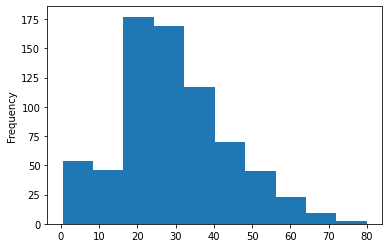

In [0]:
# dislay a continuous variable on a histogram.
titanic_data['Age'].plot(kind='hist');

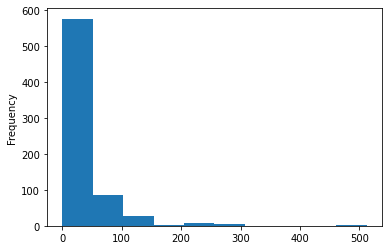

In [0]:
# display another continuous variable 'Fare' from our data
titanic_data['Fare'].plot(kind='hist');

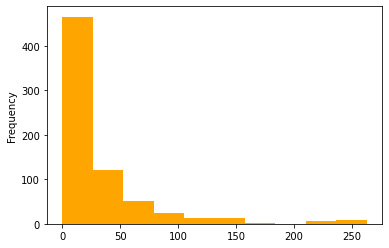

In [0]:
# remove two extreme outliers
titanic_data = titanic_data[titanic_data['Fare']<500]
titanic_data['Fare'].plot(kind='hist',color='orange');

In [0]:
# Continueous variables can be converted to a catagorical var by creating bins.
age_bins = [0,3,12,18,25,55,100]
age_labels = ['baby','child','teen','young adult','adult','senior']
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)
myresults = titanic_data['Age_Group'].value_counts().sort_index()
myresults

baby            30
child           39
teen            70
young adult    162
adult          369
senior          39
Name: Age_Group, dtype: int64

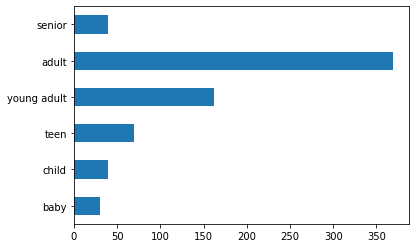

In [0]:
# Check these counts out on a bargraph
myresults.plot(kind='barh');

In [0]:
# check out the dataframe
titanic_data.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Mortality,Class_Group,Age_Group
696,0,3,male,47.0,9.0000,Southampton,Died,Third,adult
430,1,2,male,32.0,26.0000,Southampton,Survived,Second,adult
253,0,2,male,54.0,14.0000,Southampton,Died,Second,adult
330,1,1,female,33.0,90.0000,Queenstown,Survived,First,adult
603,0,2,male,18.0,11.5000,Southampton,Died,Second,teen
295,0,3,male,18.0,6.4958,Southampton,Died,Third,teen
438,1,3,male,22.0,7.2250,Cherbourg,Survived,Third,young adult
555,1,1,male,35.0,26.2875,Southampton,Survived,First,adult
332,1,2,female,34.0,32.5000,Southampton,Survived,Second,adult
285,1,1,female,22.0,55.0000,Southampton,Survived,First,young adult


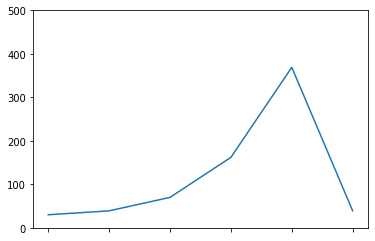

In [0]:
# sometimes it's important to specify the range of your y-axis to get more
# accurate results. 'lim'='limits'
myresults.plot(ylim=(0,500));

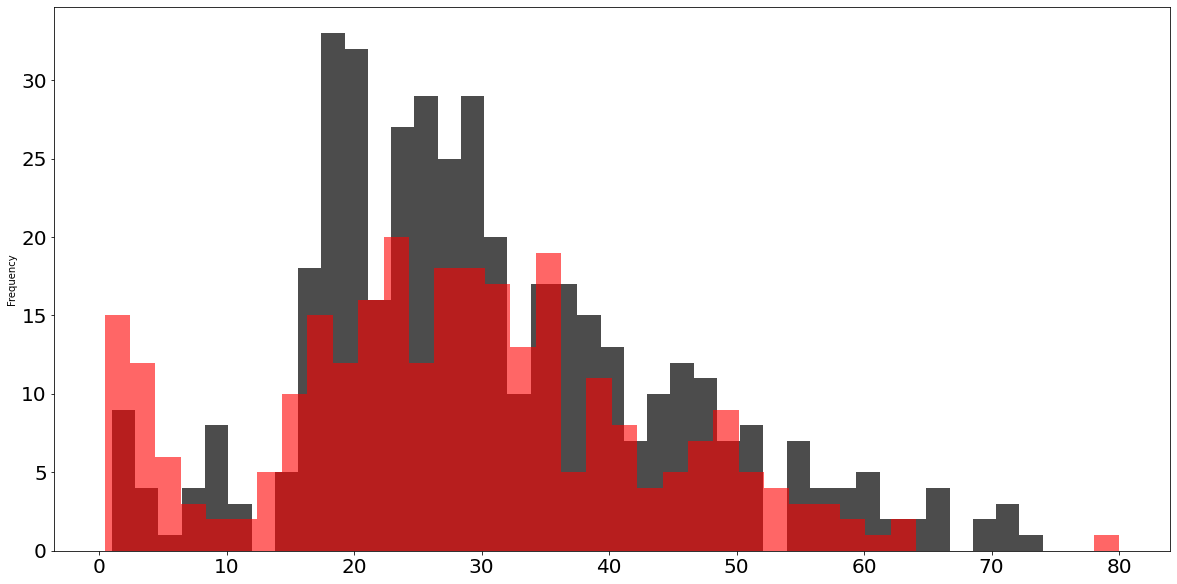

In [0]:
# stacked histogram of continuous variables, broken out by categorical data
titanic_data[titanic_data['Survived']==0]['Age'].plot(kind='hist',bins=40,figsize=(20,10),color='black',fontsize=20,alpha=0.7);
titanic_data[titanic_data['Survived']==1]['Age'].plot(kind='hist',bins=40,figsize=(20,10),color='red',fontsize=20,alpha=0.6);

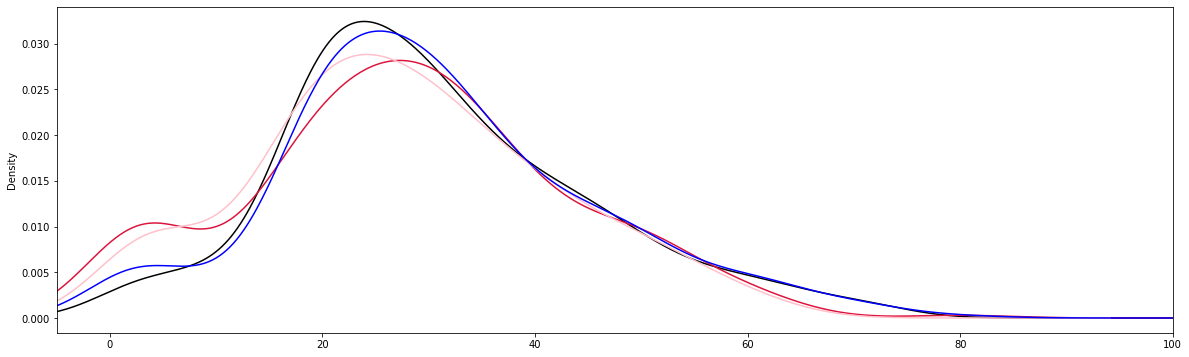

In [0]:
# lets make this plot stack easier to read by useing;
# K.ernel   >
# D.ensity    > KDE
# E.stimate >
titanic_data[titanic_data['Survived']==0]['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='black');
titanic_data[titanic_data['Survived']==1]['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='crimson');
# visualize average age based on sex
titanic_data[titanic_data['Sex']=='female']['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='pink');
titanic_data[titanic_data['Sex']=='male']['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='blue');

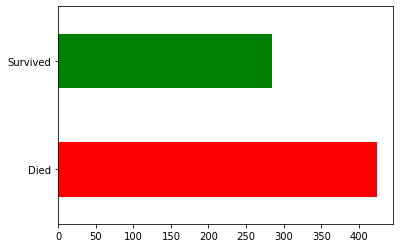

In [0]:
# Using bar charts to display categorical data:
titanic_data['Mortality'].value_counts().plot(kind='barh',color=['red','green']);

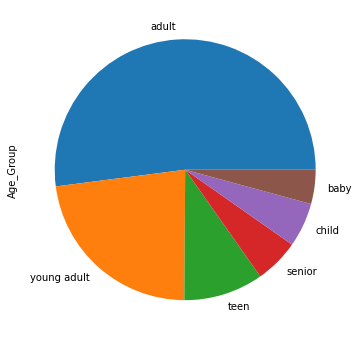

In [0]:
# Now lets use a pie chart to diply some more catagorical data:
# example using created feature 'Age_Group'
titanic_data['Age_Group'].value_counts().plot(kind='pie',figsize=(6,6));

In [0]:
# now lets compare categorical variables
# first lets make a crosstab
age_mortality = pd.crosstab(titanic_data['Age_Group'],titanic_data['Mortality'])
age_mortality

Mortality,Died,Survived
Age_Group,,
baby,10,20
child,19,20
teen,40,30
young adult,108,54
adult,219,150
senior,28,11


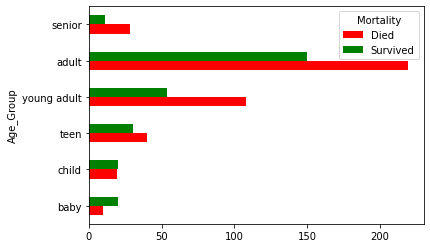

In [0]:
# lets plot our crosstab
age_mortality.plot(kind='barh',color=['red','green']);

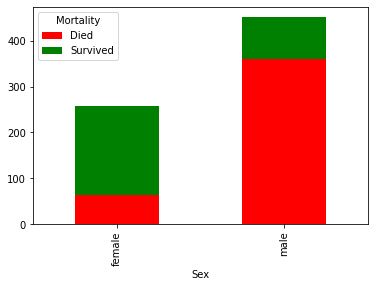

In [0]:
# lets do the same thing for sex an mortality.
sex_mortality = pd.crosstab(titanic_data['Sex'],titanic_data['Mortality'])
sex_mortality.plot(kind='bar',stacked=True,color=['red','green']);

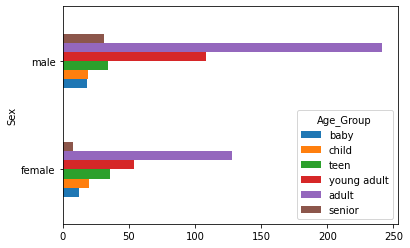

In [0]:
# one more time just to stamp it to my brain:
sex_age = pd.crosstab(titanic_data['Sex'],titanic_data['Age_Group'])
sex_age.plot(kind='barh');

###**Plotting with `matplotlib`**
- #### **Goal**: Recreate 'inconvenient-sequel' graph, using matplotlib.

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url,width=400)

display(example)

#### **Step 1:** Make fake prototypes
- This helps us understand the problem.

In [0]:
# We need a canvas style to plot with, fortunatly matplotlib has quite a few to 
# choose from. Here is how we can check them all out:
print(plt.style.available)

# Since there is already a 'fivethirtyeight' style, lets use that, if we are trying to 
# replicate fivethirtyeight data anyway right!?
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


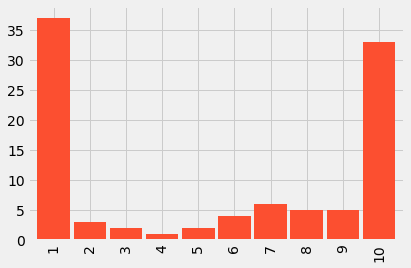

In [0]:
# Create some fake data to replicate the example image.
fake_ratings_1 = pd.Series([37,3,2,1,2,4,6,5,5,33], index=range(1,11))

# Now lets plot our fake data:
fake_ratings_1.plot.bar(color='C1', width=0.9);

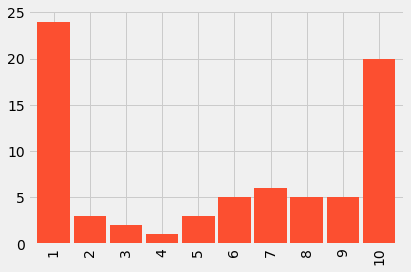

In [0]:
# Another way to create some fake data to replicate the example image.
fake_ratings_2 = pd.Series(
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
     2,2,2,
     3,3,
     4,
     5,5,5,
     6,6,6,6,6,
     7,7,7,7,7,7,
     8,8,8,8,8,
     9,9,9,9,9,
     10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
     ]
)

# lets plot our fake_ratings date to see if it looks close:
fake_ratings.value_counts().sort_index().plot.bar(color='C1',width=0.9);

#### **Step 2:** Annotate with text.
- Add words to make graph pretty.

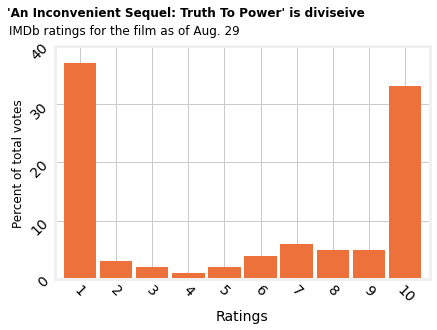

In [0]:
# Setting 'fig' and 'ax' variables as subplots.
fig, ax = plt.subplots()
# Patching in the color we will use in our graphs background. (not common) 
fig.patch.set(facecolor='white')

# Set and design the bars that will be displayed:
fake_ratings_1.plot.bar(width=0.9, color='#ED713A')

# Now apply the backgroud color we previously pathced in:
ax.set(facecolor='white')

# Set the title and subtitle of our graph:
# call `set_title` #  ('title_name_here_as_string')
ax.set_title("'An Inconvenient Sequel: Truth To Power' is diviseive",
             # declare fontsize #
             fontsize=12,
             # set left-right position #
             x=.35,
             # set up-down position #
             y=1.1,
             # make title bold #
             fontweight='bold')
# Add some text beneath the title:
# call `text` #     (s='string_of_text_describing_the_title')
ax.text(s='IMDb ratings for the film as of Aug. 29',fontsize=12,
        # set left-right position
        x=-1.95,
        # set up-down position
        y=42);

# Set the x label/name:
ax.set_xlabel('Ratings',fontsize=14)
# Set the y label/name:
ax.set_ylabel('Percent of total votes', fontsize=12)

# Fix the x and y axis tick marks and grid to better clean our image:
# call `set_xticklabels` to modify your x axis display
ax.set_xticklabels(range(1,11),rotation=-45)
# call `set_yticklabels` to modify your y axis display
ax.set_yticklabels(range(0,50,10),rotation=45)
# call `set_yticks` this sets our ticks to a  grid 
ax.set_yticks(range(0,50,10));

In [0]:
# Now lets check to how close it is to the original:
display(example)

## **Step 3**: Reproduce useing real data
- Now that we have a rough template with fake data lets use the actual rating dataset.
  - **Things to note:**
  1. The dataset shows logs of the data at different timestamps and these timestamps are `cumulative`, meaning that it has all of the ratings as earlier timestamps, but with the new ones added ontop.
  2. The dataset logs ratings breakdowns for a bunch of different demo groups per timestamp.
- Once we realize these two things, we realize that we only really need1 line of this dataset to time stamp.


In [0]:
# Read in the data from 538's github repo
real_ratings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
# Check to see if data was loaded in.
real_ratings.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Check out my data types:
#real_ratings.info()
# check the type specificaly on 'timestamp':
type(real_ratings['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
# It looks like 'timestamp' is of type 'object' we want it to be 
# a datetime object.

# Convert timestamp to date
real_ratings['timestamp'] = pd.to_datetime(real_ratings['timestamp'])
# check to confirm type conversion by calling type on the first instance in `timestamp`
type(real_ratings['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
# Create a unique index identifier using the 'timestamp' values
# to make it easier to select desired rows.
real_ratings.set_index('timestamp', inplace=True) # use inplace=True to make chages perminent.

In [0]:
# check to see if index was set:
# show the top 5 occurences of movie ratings from 2017-08-29
real_ratings['2017-08-29'].head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# since this is the day we want lets place it in a variable
last_day = real_ratings['2017-08-29'] 

In [0]:
# lets get the demographic breakdowns for all IMDb users on the last day:
last_day_filtered = last_day[last_day['category']=='IMDb users']
# check to see if the filtering worked.
last_day_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# we will just grab the very last line since we are looking for the most recent
# (latest timestamp) of IMDb user ratings.

# This should be the most up to date data from the dataset
final = last_day_filtered.tail(1)

# Convert to a Tiddy table with .T:
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
# I want to grab only the percentage columns and votes columns:

# To do this ill start by importing re: (regular expressions)
import re
# Create an empty list for my percentages:
pct_cols = []
# Create an empty list for my votes:
#votes_cols = []

# re pattern to get the percentages:
pattern_1 = re.compile(r'[\d]*_pct')
# re pattern to get the votes:
#pattern_2 = re.compile(r'[\d]*_votes')

# using a for loop to append the desired values to my empty lists:
for i in final:
    # check if pattern match is True:
    if re.match(pattern_1, i):
        # if True then append matched value to desired list:
        pct_cols.append(i)     
    # elif re.match(pattern_2, i):
    #     votes_cols.append(i)

In [0]:
# check to see if lists were created properly:
# there should be 10 instances per list
print('pct_cols:')
display(pct_cols)

pct_cols:


['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [0]:
# check it out in Tidy format:
final[pct_cols].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# Now lets reset the index so that it's numeric again and we will rename
# the percent column for easy access in our plotting

# Create a variable for our Tiddy table:
plot_data = final[pct_cols].T
# set index to a range of 1 to 10:
plot_data.index = range(1,11)
# set columns to 'percent'
plot_data.columns = ['percent']
# display data
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


- Now lets generate the figure

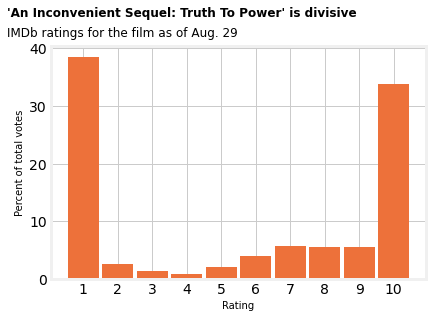

In [0]:
# Create our subplot varables() for our figure and its axes:
fig, ax = plt.subplots()

# Patch in figure background color:
fig.patch.set(facecolor='white')

# Style the bars of our graph:
       # set x 1 through 10:
ax.bar(x=range(1,11),
       # set our height by the percentages:
       height=plot_data['percent'],
       # set bar width:
       width=0.9,
       # set color using hex code 
       color='#ED713A')

# Set the axes background color:
ax.set(facecolor='white')

# Set the title and subtitle:
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29",
        fontsize=12,
        x=-1.20,
        y=42)

# Set the x and y labels:
ax.set_xlabel('Rating',fontsize=10)
ax.set_ylabel('Percent of total votes', fontsize=10)

# Fix the x an y axis tixk marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10), rotation=0 )
ax.set_yticks(range(0,50,10));

In [0]:
# display the example to compare:
display(example)

# 2. Reproduce another example from FiveThirtyEight's shared data repository.

In [0]:
# Imoprt tools:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Imports needed to display images from a url:
from IPython.display import display, Image
# Image Link of example to replicate:
img_url = 'https://fivethirtyeight.com/wp-content/uploads/2014/11/chalabi-flowers-feature-commonname-1.png?w=575'
# Create a variable to check our example when we need to:
example = Image(url=img_url, width=500)
# Display the examplt image:
display(example)

In [0]:
! wget https://github.com/dustin-py/data/archive/master.zip
! unzip master.zip

--2020-05-15 01:25:30--  https://github.com/dustin-py/data/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/dustin-py/data/zip/master [following]
--2020-05-15 01:25:30--  https://codeload.github.com/dustin-py/data/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.2’

master.zip.2            [               <=>  ]  52.81M  6.28MB/s    in 8.4s    

2020-05-15 01:25:38 (6.28 MB/s) - ‘master.zip.2’ saved [55371402]

Archive:  master.zip
81d8f346256a2b3b4f52bf4cb9931e9220e0063d
replace data-master/.gitattributes? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
# Url for the csv file with the data we will need to recreate the graph image:

names_path = 'data-master/most-common-name/new-top-firstNames.csv'

# Create a pandas dataframe for the unisex names data:
names = pd.read_csv(names_path,index_col='Unnamed: 0')


In [0]:
# check out our dataset head
top_20_names = names.head(20)

In [0]:
top_20_names

,name,newPerct2013
1,Michael,0.011577
2,James,0.010218
3,John,0.009675
4,Robert,0.009493
5,David,0.008943
6,William,0.007484
7,Mary,0.006839
8,Christopher,0.005901
9,Joseph,0.005410
10,Richard,0.005346


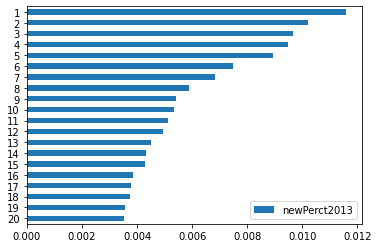

In [0]:
top_20_names[['name','newPerct2013']].sort_values('newPerct2013').plot.barh(grid=False);

In [0]:
female = ['Mary','Jennifer','Patricia','Linda','Elizabeth']

In [0]:
def makeSex(female):
    global sex
    global sex_col 
    sex_col = []
    for i in top_20_names['name']:
            if i in female:
                sex_col.append('Female')
            else:
                sex_col.append('Male')    
    sex = pd.DataFrame({'Sex':sex_col})       
makeSex(female)                

In [0]:
sex

,Sex
0,Male
1,Male
2,Male
3,Male
4,Male
5,Male
6,Female
7,Male
8,Male
9,Male


In [0]:
top_20_names['sex'] = sex

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
y = top_20_names['name']
x = round(top_20_names['newPerct2013']*1000,1)

In [0]:
x

1     11.6
2     10.2
3      9.7
4      9.5
5      8.9
6      7.5
7      6.8
8      5.9
9      5.4
10     5.3
11     5.1
12     4.9
13     4.5
14     4.3
15     4.3
16     3.8
17     3.8
18     3.8
19     3.6
20     3.5
Name: newPerct2013, dtype: float64

TypeError: ignored

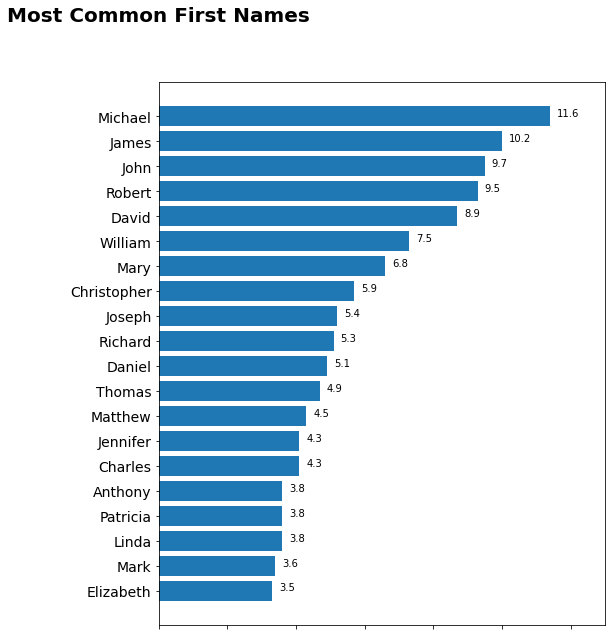

In [0]:
fig,ax=plt.subplots()

fig.patch.set(facecolor='white')

fig.set_size_inches(8, 10)


chart = ax.barh(y,width=x-0.2,height=.8)
for index, value in enumerate(x):
    plt.text(value, index, str(value))

ax.set_xticklabels('')
ax.set_yticklabels(y,fontsize=14)

ax.set_ylim(ax.get_ylim()[::-1]) # invert y axis
ax.set_xlim(xmin=0.0,xmax=13)

ax.set_title("Most Common First Names",
             fontsize=20,
             x=0,
             y=1.1,
             fontweight='bold')
ax.text('Per 1,000 Americans as of 2013',
            fontsize=18,
            x=0,
            y=1);



# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here